In [503]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn stuff
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification, make_circles
from sklearn.decomposition import PCA

# keras stuff
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

%matplotlib inline

In [30]:
def plot_colors(X, y):
    y = y / y.sum()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.5)

In [71]:
def generate_xor(n):
    X = np.random.rand(n,2)
    y = np.zeros(n)
    d1_min, d1_max = X[:,0].min(), X[:,0].max()
    d2_min, d2_max = X[:,1].min(), X[:,1].max()
    t1 = (d1_max - d1_min)/2
    t2 = (d2_max - d2_min)/2
    
    sec1 = np.logical_and(X[:,0] < t1, X[:,1] < t2)
    sec2 = np.logical_and(X[:,0] >= t1, X[:,1] >= t2)
    y[sec1] = 1
    y[sec2] = 1
    return X, y

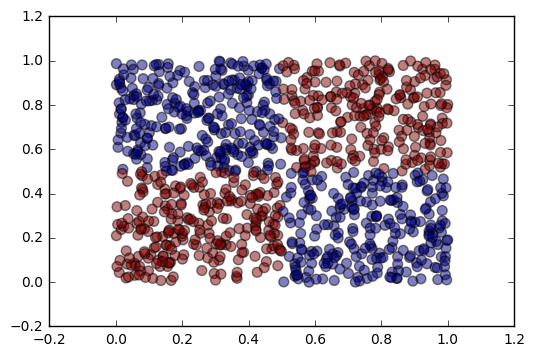

In [72]:
n = 1000
X, y = generate_xor(n)
plot_colors(X, y)

In [107]:
xTr, xTe, yTr, yTe = train_test_split(X,y, test_size=0.2, random_state=42)

In [108]:
lr = LogisticRegression()
lr.fit(xTr, yTr)
lr.score(xTe, yTe)

0.47999999999999998

In [303]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)

model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [345]:
print(model.evaluate(x_test, y_test, batch_size=1))
model.fit(x_train, y_train, epochs=20, batch_size=128)
print(model.evaluate(x_test, y_test, batch_size=1))

440/500 [=========================>....] - ETA: 0s[0.065197563647270668, 0.98399999999999999]
Epoch 1/20
500/500 [==============================] - 0s - loss: 0.0742 - acc: 0.9800     
Epoch 2/20
500/500 [==============================] - 0s - loss: 0.0737 - acc: 0.9840     
Epoch 3/20
500/500 [==============================] - 0s - loss: 0.0748 - acc: 0.9880     
Epoch 4/20
500/500 [==============================] - 0s - loss: 0.0748 - acc: 0.9800     
Epoch 5/20
500/500 [==============================] - 0s - loss: 0.0739 - acc: 0.9780     
Epoch 6/20
500/500 [==============================] - 0s - loss: 0.0727 - acc: 0.9800     
Epoch 7/20
500/500 [==============================] - 0s - loss: 0.0724 - acc: 0.9860     
Epoch 8/20
500/500 [==============================] - 0s - loss: 0.0732 - acc: 0.9800     
Epoch 9/20
500/500 [==============================] - 0s - loss: 0.0736 - acc: 0.9800     
Epoch 10/20
500/500 [==============================] - 0s - loss: 0.0721 - acc: 0.9840 

In [396]:
x, y = make_classification(1000)
model = Sequential([
        Dense(32, input_dim=20, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [397]:
xTr, xTe, yTr, yTe = train_test_split(x,y, test_size=0.2, random_state=42)

In [398]:
score = model.fit(xTr, yTr, epochs=1000, batch_size=128)

Epoch 1/1000
800/800 [==============================] - 0s - loss: 0.7375 - acc: 0.5437     
Epoch 2/1000
800/800 [==============================] - 0s - loss: 0.6330 - acc: 0.6412     
Epoch 3/1000
800/800 [==============================] - 0s - loss: 0.6619 - acc: 0.6100     
Epoch 4/1000
800/800 [==============================] - 0s - loss: 0.6336 - acc: 0.6475     
Epoch 5/1000
800/800 [==============================] - 0s - loss: 0.5953 - acc: 0.6638     
Epoch 6/1000
800/800 [==============================] - 0s - loss: 0.5692 - acc: 0.7000     
Epoch 7/1000
800/800 [==============================] - 0s - loss: 0.5863 - acc: 0.6875     
Epoch 8/1000
800/800 [==============================] - 0s - loss: 0.5395 - acc: 0.7338     
Epoch 9/1000
800/800 [==============================] - 0s - loss: 0.5244 - acc: 0.7512     
Epoch 10/1000
800/800 [==============================] - 0s - loss: 0.5000 - acc: 0.7737     
Epoch 11/1000
800/800 [==============================] - 0s - loss: 0

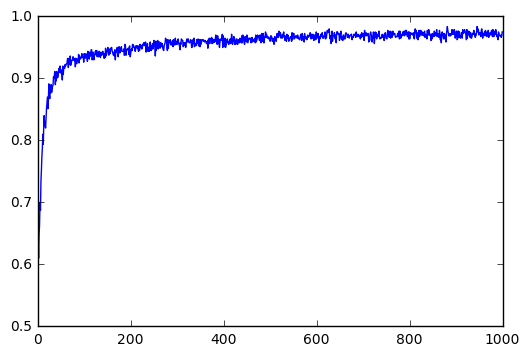

In [402]:
plt.plot(score.history['acc'])

In [403]:
make_circles?

In [424]:
x, y = make_circles(1000, noise=0.1, factor=0.5)
xTr, xTe, yTr, yTe = train_test_split(x, y, test_size=0.2)

model = Sequential([
        Dense(32, input_dim=2, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [427]:
score = model.fit(xTr, yTr, epochs=100)

Epoch 1/100
800/800 [==============================] - 0s - loss: 0.0758 - acc: 0.9738     
Epoch 2/100
800/800 [==============================] - 0s - loss: 0.0973 - acc: 0.9750     
Epoch 3/100
800/800 [==============================] - 0s - loss: 0.0909 - acc: 0.9750     
Epoch 4/100
800/800 [==============================] - 0s - loss: 0.1021 - acc: 0.9688     
Epoch 5/100
800/800 [==============================] - 0s - loss: 0.0933 - acc: 0.9675     
Epoch 6/100
800/800 [==============================] - 0s - loss: 0.0794 - acc: 0.9763     
Epoch 7/100
800/800 [==============================] - 0s - loss: 0.1027 - acc: 0.9688     
Epoch 8/100
800/800 [==============================] - 0s - loss: 0.0826 - acc: 0.9738     
Epoch 9/100
800/800 [==============================] - 0s - loss: 0.0886 - acc: 0.9738     
Epoch 10/100
800/800 [==============================] - 0s - loss: 0.0899 - acc: 0.9725     
Epoch 11/100
800/800 [==============================] - 0s - loss: 0.0720 - acc

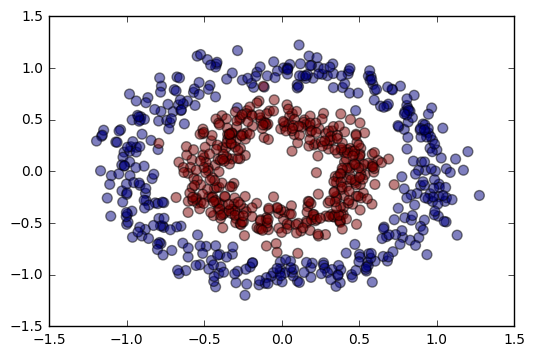

In [435]:
plot_colors(xTr, yTr)

In [460]:
def make_correlated_dataset(n):
    x = np.random.rand(n, 2)
    X = x.dot(x.T)[:, :2]
    y = np.zeros(n)
    d1_min, d1_max = X[:,0].min(), X[:,0].max()
    d2_min, d2_max = X[:,1].min(), X[:,1].max()
    t1 = (d1_max - d1_min)/2
    t2 = (d2_max - d2_min)/2
    
    sec1 = np.logical_and(X[:,0] < t1, X[:,1] < t2)
    sec2 = np.logical_and(X[:,0] >= t1, X[:,1] >= t2)
    y[sec1] = 1
    y[sec2] = 1
    return X, y

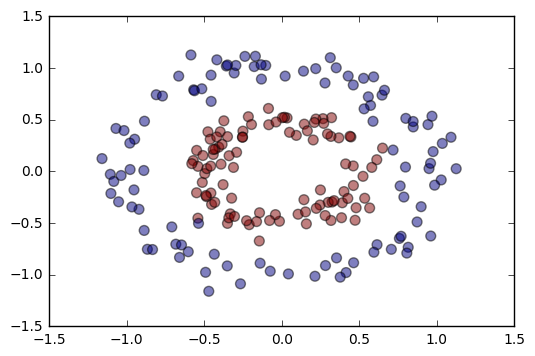

In [433]:
plot_colors(xTe, model.predict(xTe).flatten().round())

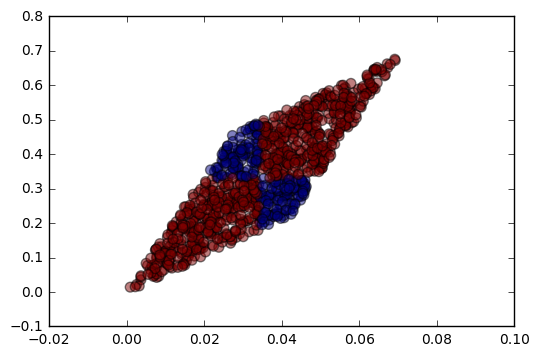

In [510]:
X, y = make_correlated_dataset(1000)
plot_colors(X, y)
xTr, xTe, yTr, yTe = train_test_split(X, y)

model = Sequential([
        Dense(32, input_dim=2, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [500]:
history = model.fit(xTr, yTr, epochs=500, batch_size=128)

Epoch 1/500
750/750 [==============================] - 0s - loss: 0.2297 - acc: 0.9227     
Epoch 2/500
750/750 [==============================] - 0s - loss: 0.2342 - acc: 0.9160     
Epoch 3/500
750/750 [==============================] - 0s - loss: 0.2401 - acc: 0.8920     
Epoch 4/500
750/750 [==============================] - 0s - loss: 0.2339 - acc: 0.9107     
Epoch 5/500
750/750 [==============================] - 0s - loss: 0.2401 - acc: 0.9027     
Epoch 6/500
750/750 [==============================] - 0s - loss: 0.2216 - acc: 0.9173     
Epoch 7/500
750/750 [==============================] - 0s - loss: 0.2275 - acc: 0.9200     
Epoch 8/500
750/750 [==============================] - 0s - loss: 0.2811 - acc: 0.9000     
Epoch 9/500
750/750 [==============================] - 0s - loss: 0.2118 - acc: 0.9080     
Epoch 10/500
750/750 [==============================] - 0s - loss: 0.2245 - acc: 0.9173     
Epoch 11/500
750/750 [==============================] - 0s - loss: 0.2331 - acc

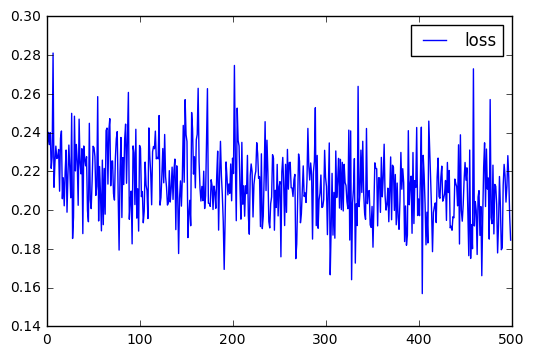

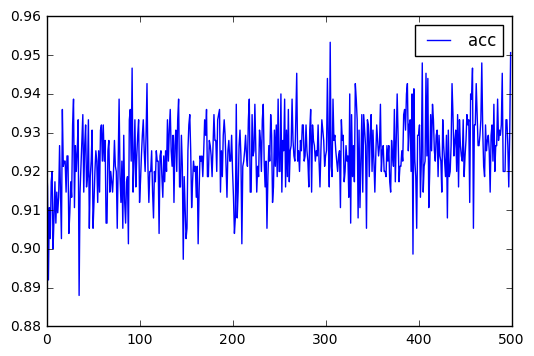

In [501]:
plt.plot(history.history['loss'])
plt.legend(['loss'])
plt.show()
plt.plot(history.history['acc'])
plt.legend(['acc'])

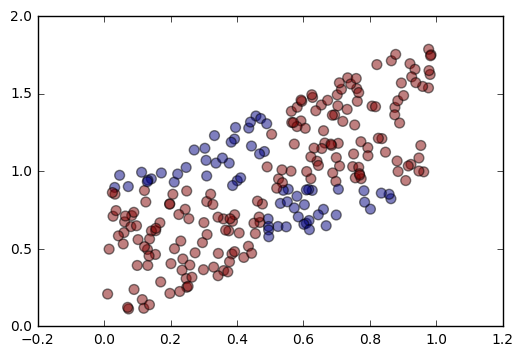

In [502]:
plot_colors(xTe, model.predict(xTe).flatten().round())

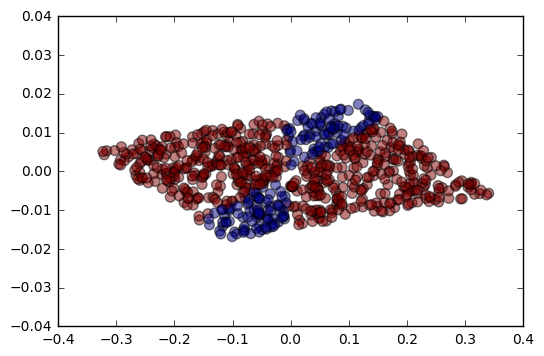

In [513]:
pca = PCA(n_components=2)
pca.fit(X)
X_decorr = pca.transform(X)
xTr, xTe, yTr, yTe = train_test_split(X_decorr, y)
plot_colors(xTr, yTr)

In [517]:
history = model.fit(xTr, yTr, epochs=500, batch_size=128)

Epoch 1/500
750/750 [==============================] - 0s - loss: 0.2548 - acc: 0.8680     
Epoch 2/500
750/750 [==============================] - 0s - loss: 0.2574 - acc: 0.8707     
Epoch 3/500
750/750 [==============================] - 0s - loss: 0.2362 - acc: 0.8813     
Epoch 4/500
750/750 [==============================] - 0s - loss: 0.2392 - acc: 0.8733     
Epoch 5/500
750/750 [==============================] - 0s - loss: 0.2452 - acc: 0.8733     
Epoch 6/500
750/750 [==============================] - 0s - loss: 0.2438 - acc: 0.8747     
Epoch 7/500
750/750 [==============================] - 0s - loss: 0.2431 - acc: 0.8867     
Epoch 8/500
750/750 [==============================] - 0s - loss: 0.2418 - acc: 0.8707     
Epoch 9/500
750/750 [==============================] - 0s - loss: 0.2477 - acc: 0.8707     
Epoch 10/500
750/750 [==============================] - 0s - loss: 0.2408 - acc: 0.8747     
Epoch 11/500
750/750 [==============================] - 0s - loss: 0.2453 - acc

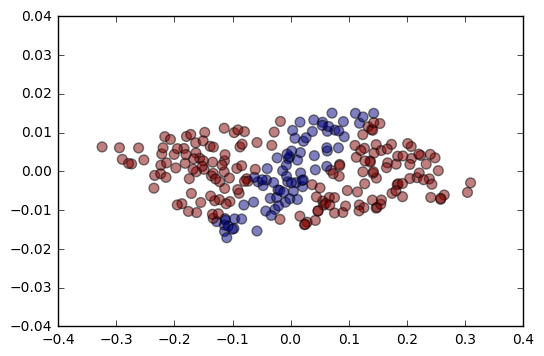

In [518]:
plot_colors(xTe, model.predict(xTe).flatten().round())

In [499]:
n, _ = X.shape
(np.dot(X[:,0], X[:,1]) - n*X[:,0].mean()*X[:,1].mean())/(n*X[:,0].std()*X[:,1].std())

0.69828518909632842